In [ ]:
#Step 2

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)



Using TensorFlow backend.


In [1]:
#uploading csv file

from google.colab import files
uploaded = files.upload()

Saving sonar.all-data to sonar.all-data


In [ ]:
#Importing file

import io
data = io.BytesIO(uploaded['sonar.csv'])

In [ ]:
# load dataset
dataframe = pandas.read_csv(data, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [ ]:
print(X[0])
print(Y[0])


[0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
 0.1609 0.1582 0.2238 0.0645 0.066  0.2273 0.31   0.2999 0.5078 0.4797
 0.5783 0.5071 0.4328 0.555  0.6711 0.6415 0.7104 0.808  0.6791 0.3857
 0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
 0.051  0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
 0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018  0.0084 0.009  0.0032]
R


In [ ]:
dataframe[:10]

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [ ]:

#Encoding labels

# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(Y)
print(list(le.classes_))
encoded_Y=le.transform(Y)

print('\n Encoded Labels',encoded_Y)

print("\n",le.inverse_transform([0,1]))

['M', 'R']

 Encoded Labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 ['M' 'R']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
# baseline model

def create_baseline():
#creating a model
    
    model=Sequential()
    model.add(Dense(60, activation='relu', input_shape=(60,)))
    model.add(Dense(1, activation='sigmoid'))
    
    #compiling it
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model


In [ ]:
# evaluate model with standardized dataset

estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 83.71% (6.13%)


**Step 3. Re-Run The Baseline Model With Data Preparation**

In [ ]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Standardized: 85.59% (7.46%)


In [ ]:
print(len(estimators))

2


**Step 4. Tuning Layers and Number of Neurons in The Model**

In [ ]:
#4.1. Evaluate a Smaller Network

# smaller model
def create_smaller():
	#creating a model
    
  model=Sequential()
  model.add(Dense(30, activation='relu', input_shape=(60,)))
  model.add(Dense(1, activation='sigmoid'))
    
  #compiling it
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model
	
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Smaller: 85.54% (7.82%)


In [ ]:
#Step 4.2. Evaluate a Larger Network

# Larger model
def create_larger():
	#creating a model
    
  model=Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
    
  #compiling it
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model
	
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



larger: 84.54% (8.16%)


**Step 5: Really Scaling up: developing a model that overfits**

In [ ]:
#very large model


def create_larger():
	#creating a model
    
  model=Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
    
  #compiling it
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model
	
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=250, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



larger: 84.11% (8.17%)


**Step 6: Tuning the Model**

In [ ]:
# Tuned Model

#optimizer=rmsprop , epochs=50 , batch size=5 Accuracy=82.16% (7.22%)
#optimizer=rmsprop , epochs=40 , batch size=5 Accuracy=82.16% (7.86%)
#optimizer=adam , epochs=40 , batch size=5 Accuracy= 85.04% (9.28%)


def create_baseline():
#creating a model
    
    model=Sequential()
    model.add(Dense(60, activation='relu', input_shape=(60,)))
    model.add(Dense(1, activation='sigmoid'))
    
    #compiling it
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

  
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=40, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Tuned model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



Tuned model: 85.04% (9.28%)


***Highest accuracy so far is 85.04%***

**Step 7: Rewriting the code using the Keras Functional API**

In [ ]:
# functional API

from keras.layers import Input, Dense
from keras.models import Model

def functional_api():
  # This returns a tensor
  inputs = Input(shape=(60,))

  # a layer instance is callable on a tensor, and returns a tensor
  x = Dense(60, activation='relu')(inputs)
  predictions = Dense(1, activation='sigmoid')(x)

  # This creates a model that includes
  # the Input layer and three Dense layers
  model = Model(inputs=inputs, outputs=predictions)
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=functional_api, epochs=40, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



Results: 87.95% (6.23%)


In [ ]:
#testing the model
#not a part of the project

#  Results: 87.95% (6.23%)
  
  # This returns a tensor
inputs = Input(shape=(60,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(60, activation='relu')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X,
                  encoded_Y,
                 epochs=50) 

In [ ]:
history.history

**Step 8: Rewriting the code by doing Model Subclassing**

In [ ]:
import keras
from keras import layers

class MyModel(keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.dense1=layers.Dense(60,activation="relu")
        self.dense2=layers.Dense(1,activation="sigmoid")
  
    def call(self,inputs):
        x=self.dense1(x)
        return self.dense2(x)

model=MyModel()
hist=model.fit(X,encoded_Y,epochs=4,batch_size=5)
hist



**Step 9: Rewriting the code without using scikit-learn**

In [ ]:
def build_model():
#creating a model
    
  model=Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(1, activation='sigmoid'))
    
  #compiling it
  model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])
  return model



In [ ]:
# k fold code

import numpy as np
k =15
num_val_samples = len(X) // k
num_epochs = 100
all_scores = []

#following lists have mean values at every k fold
acc=[]
loss=[]
val_acc=[]
val_loss=[]

#following 2 lists have the accuracies for every epoch
acc_epoch=[]
val_acc_epoch=[]

for i in range(k):
  print('processing fold #', i)
  val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = encoded_Y[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [X[:i * num_val_samples],
  X[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [encoded_Y[:i * num_val_samples],
  encoded_Y[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  hist=model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=1,validation_data=(val_data,val_targets),verbose=0)
  
  #taking mean of acc and losses for plotting
  acc.append(np.mean(hist.history["acc"]))
  loss.append(np.mean(hist.history["loss"]))

  val_acc.append(np.mean(hist.history["val_acc"]))
  val_loss.append(np.mean(hist.history["val_loss"]))
  
  acc_epoch.append(hist.history["acc"])
  val_acc_epoch.append(hist.history["val_acc"])
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9
processing fold # 10
processing fold # 11
processing fold # 12
processing fold # 13
processing fold # 14


***plotting the validation and training accuracy at every [epoch]***


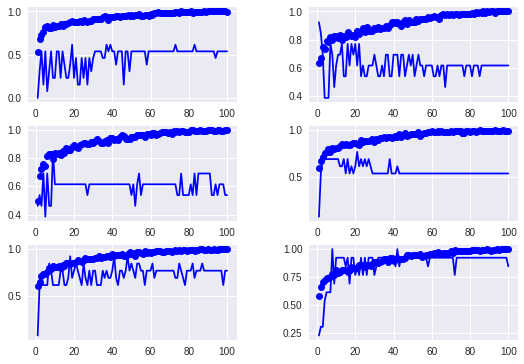

In [ ]:
import matplotlib.pyplot as plt

# Making the subplot and the figure for tw side by side plots
plt.figure(1)

epochs=range(1,101)

#plt.subplot(nrows,ncoloumns,index) 

plt.subplot(321)
plt.plot(epochs,acc_epoch[0],"bo")
plt.plot(epochs,val_acc_epoch[0],"b")

plt.subplot(322)
plt.plot(epochs,acc_epoch[1],"bo")
plt.plot(epochs,val_acc_epoch[1],"b")

plt.subplot(323)
plt.plot(epochs,acc_epoch[2],"bo")
plt.plot(epochs,val_acc_epoch[2],"b")

plt.subplot(324)
plt.plot(epochs,acc_epoch[3],"bo")
plt.plot(epochs,val_acc_epoch[3],"b")

plt.subplot(325)
plt.plot(epochs,acc_epoch[4],"bo")
plt.plot(epochs,val_acc_epoch[4],"b")


plt.subplot(326)
plt.plot(epochs,acc_epoch[5],"bo")
plt.plot(epochs,val_acc_epoch[5],"b")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()



**Plotting Accuracy and loss**

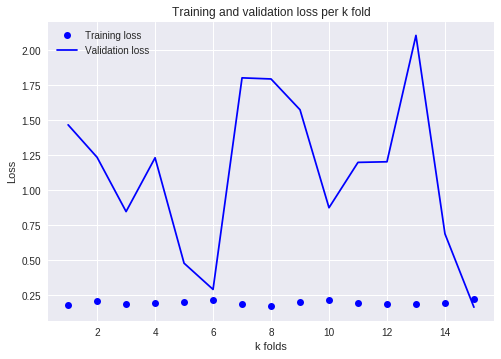

In [ ]:
import matplotlib.pyplot as plt

k_folds = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(k_folds, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(k_folds, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss per k fold')
plt.xlabel('k folds')
plt.ylabel('Loss')
plt.legend()

plt.show()

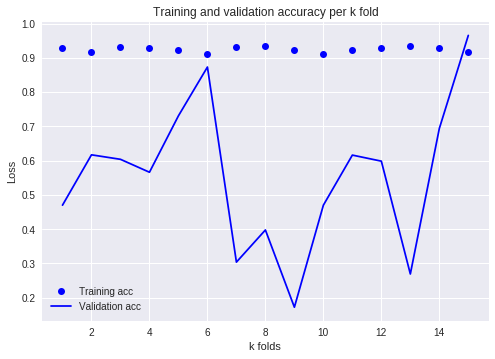

In [ ]:
plt.plot(k_folds, acc, 'bo', label='Training acc')
plt.plot(k_folds, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy per k fold')
plt.xlabel('k folds')
plt.ylabel('Loss')
plt.legend()

plt.show()